# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")


# Data

In [2]:
car_models = ['audi', 'bmw', 'cclass', 'focus', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
df = pd.DataFrame()

for i in car_models:
    carmodel_df = pd.read_csv('dataset/'+i+'.csv')
    if i == 'hyundi':
        carmodel_df = carmodel_df.rename(columns={'tax(£)': 'tax'})

    df = pd.concat([df, carmodel_df])
    

In [3]:
# reset ulang index, karena index masih menggunakan index dataframe sebelum digabung
df = df.reset_index()

In [4]:
# drop index lama
df = df.drop(columns='index')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


# EDA

## Deskripsi Statistik

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.5+ MB


In [6]:
df.describe(include=object)

,model,transmission,fuelType
count,108540,108540,108540
unique,195,4,5
top,Focus,Manual,Petrol
freq,10042,61308,59875


In [7]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


> dari data diatas, dapat kita lihat bahwa engineSize memiliki nilai minimum 0, dimana hal tersebut tidak mungkin karena tidak ada kendaraan dengan engineSize = 0

In [8]:
df[df['engineSize'] == 0.0].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
7505,Q5,2019,44790,Automatic,5886,Petrol,135.0,117.7,0.0
7506,Q3,2019,32788,Automatic,1500,Diesel,145.0,47.1,0.0
7516,Q3,2020,29944,Manual,1500,Petrol,145.0,40.9,0.0
7517,Q3,2020,33333,Automatic,1500,Diesel,145.0,47.1,0.0
7518,Q3,2020,29944,Automatic,1500,Petrol,145.0,32.5,0.0


In [9]:
df['engineSize'].unique()

array([1.4, 2. , 1. , 3. , 1.6, 1.8, 1.5, 4. , 2.5, 1.2, 4.2, 2.9, 5.2,
       1.9, 2.7, 0. , 3.2, 4.1, 6.3, 0.6, 4.4, 2.2, 5. , 6.6, 2.8, 3.5,
       2.1, 6.2, 3.6, 5.4, 2.6, 2.3, 1.1, 1.3, 1.7, 2.4, 5.5, 4.7, 6. ,
       3.7, 4.3, 4.5])

In [10]:
totalZeroEngine = df[df['engineSize'] == 0.0]['engineSize'].count()
zeroEnginePersentage = totalZeroEngine / df.shape[0] * 100
print('karena hanya terdapat sebanyak', totalZeroEngine, 'data atau sebesar', round(zeroEnginePersentage, 3), '% dari keseluruhan data, maka data dengan engineSize = 0.0 akan didrop')

karena hanya terdapat sebanyak 286 data atau sebesar 0.263 % dari keseluruhan data, maka data dengan engineSize = 0.0 akan didrop


In [11]:
df = df.drop(df[df['engineSize'] == 0.0].index, axis = 0)

## Distribusi Data

In [12]:
num_features=list(df.dtypes[df.dtypes!=object].index)
num_features.remove('year')
num_features

['price', 'mileage', 'tax', 'mpg', 'engineSize']

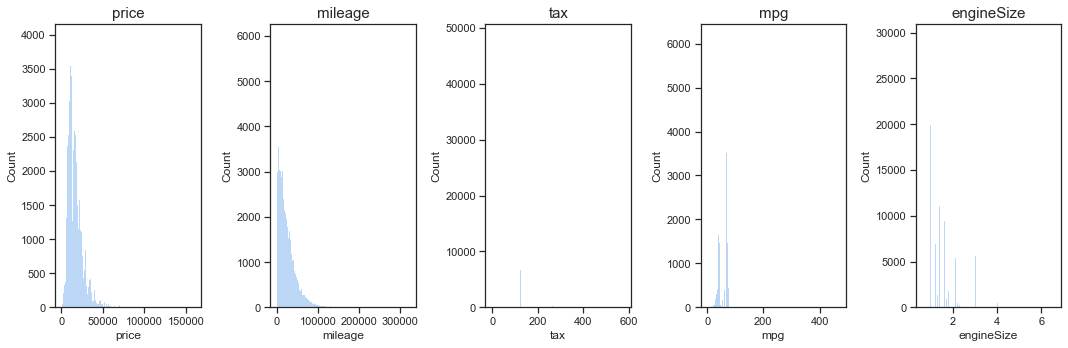

In [13]:
figure, axis = plt.subplots(1,5,figsize=(15,5))

for i in range(len(num_features)):
    axis[i].set_title(num_features[i], size=15)
    sns.histplot(ax=axis[i], data = df, x=num_features[i])

# auto padding subplot
plt.tight_layout()
plt.show()

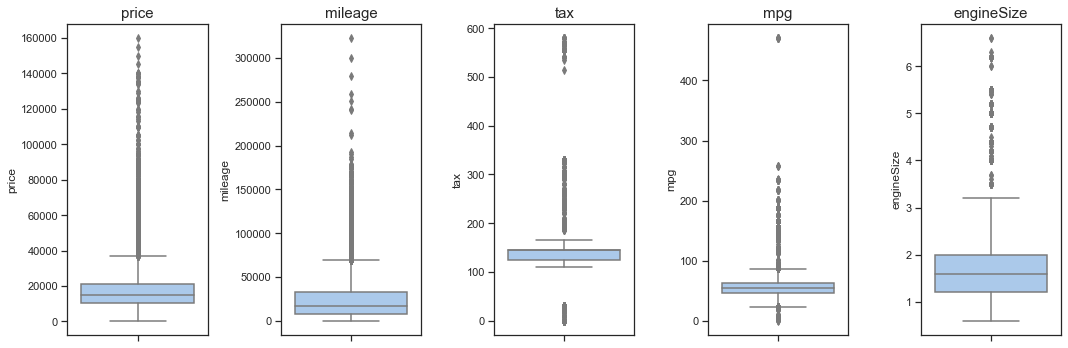

In [14]:
figure, axis = plt.subplots(1,5,figsize=(15,5))

for i in range(len(num_features)):
    axis[i].set_title(num_features[i], size=15)
    sns.boxplot(ax=axis[i], data = df, y=num_features[i])

# auto padding subplot
plt.tight_layout()
plt.show()

* berdasarkan histplot, sebaran data kelima feature cenderung *right-skew*.
* berdasarkan boxplot, sebaran data kelima feature memiliki banyak outlier di sebalah kanan.
* dapat disimpulkan persebaran data kelima data numerik tsb memiliki distribusi tidak normal.

## Correlation

In [15]:
df[num_features].corr(method='spearman')

,price,mileage,tax,mpg,engineSize
price,1.000000,-0.523824,0.318304,-0.393950,0.576651
mileage,-0.523824,1.000000,-0.263125,0.336257,0.103315
tax,0.318304,-0.263125,1.000000,-0.576045,0.165617
mpg,-0.393950,0.336257,-0.576045,1.000000,-0.207416
engineSize,0.576651,0.103315,0.165617,-0.207416,1.000000


## Missing Value

In [17]:
df.isna().sum() / df.shape[0] * 100

model           0.000000
year            0.000000
price           0.000000
transmission    0.000000
mileage         0.000000
fuelType        0.000000
tax             8.627857
mpg             8.627857
engineSize      0.000000
dtype: float64

### Handling Missing Value in Tax

https://www.gov.uk/calculate-tax-rates-for-new-cars

berdasarkan referensi diatas, untuk perhitungan 


pending